# 1. Introduction to NLP: Reading and Tokenizing Text

In [2]:
# Sample text data
data = [
    "Natural Language Processing is amazing!",
    "Generative AI creates new content based on input data.",
    "Large Language Models are powerful tools for NLP tasks.",
    "Embeddings are numerical representations of text.",
    "Transformers revolutionized NLP with self-attention mechanisms."
]

# Tokenization
def tokenize(text):
    # Aktualnie nie robi się juz lower bo modele są z reguły tak zaawansowane, że nie ma to znaczenia
    return text.lower().split()

# Tokenize all sentences
tokenized_text = [tokenize(sentence) for sentence in data]
print("Tokenized Sentences:")
for text in tokenized_text:
    print(text)

Tokenized Sentences:
['natural', 'language', 'processing', 'is', 'amazing!']
['generative', 'ai', 'creates', 'new', 'content', 'based', 'on', 'input', 'data.']
['large', 'language', 'models', 'are', 'powerful', 'tools', 'for', 'nlp', 'tasks.']
['embeddings', 'are', 'numerical', 'representations', 'of', 'text.']
['transformers', 'revolutionized', 'nlp', 'with', 'self-attention', 'mechanisms.']


# 2. Splitting Methods

### Word Splitting


In [3]:
def word_splitting(text):
    return text.split()

word_split_data = [word_splitting(sentence) for sentence in data]
print("Word Splitting:")
for sentence in word_split_data:
    print(sentence)

Word Splitting:
['Natural', 'Language', 'Processing', 'is', 'amazing!']
['Generative', 'AI', 'creates', 'new', 'content', 'based', 'on', 'input', 'data.']
['Large', 'Language', 'Models', 'are', 'powerful', 'tools', 'for', 'NLP', 'tasks.']
['Embeddings', 'are', 'numerical', 'representations', 'of', 'text.']
['Transformers', 'revolutionized', 'NLP', 'with', 'self-attention', 'mechanisms.']


### Sentence Splitting

In [4]:
sentences = "\n\n".join(data).split('. ')
print("\nSentence Splitting:")
for sentence in sentences:
    print(sentence)


Sentence Splitting:
Natural Language Processing is amazing!

Generative AI creates new content based on input data.

Large Language Models are powerful tools for NLP tasks.

Embeddings are numerical representations of text.

Transformers revolutionized NLP with self-attention mechanisms.


### Fixed-Size Chunking (10 words per chunk)

In [5]:
def fixed_size_chunking(text, chunk_size):
    words = text.split()
    return [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

chunks = fixed_size_chunking("\n\n".join(data), chunk_size=10)
print("\nSemantic Splitting:")
for chunk in chunks:
    print(chunk)


Semantic Splitting:
Natural Language Processing is amazing! Generative AI creates new content
based on input data. Large Language Models are powerful tools
for NLP tasks. Embeddings are numerical representations of text. Transformers
revolutionized NLP with self-attention mechanisms.


### Semantic Splitting using Sentence Transformers

In [6]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model_semantic_split = SentenceTransformer('paraphrase-MiniLM-L6-v2') # https://sbert.net/docs/sentence_transformer/pretrained_models.html#original-models
embeddings = model_semantic_split.encode(sentences)

# To zwróci grupy semantyczne - w tym przypadku zdania
semantic_groups = []
for i, embedding in enumerate(embeddings):
    group = [sentences[i]]
    for j in range(len(embeddings)):
        if i != j and cosine_similarity([embedding], [embeddings[j]])[0][0] > 0.8:
            group.append(sentences[j])
    semantic_groups.append(group)

print("\nSemantic Splitting:")
for group in semantic_groups:
    for text in group:
        print(text)

/Users/tomasz/Developer/TEG---Technologie-Generatywne/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Semantic Splitting:
Natural Language Processing is amazing!

Generative AI creates new content based on input data.

Large Language Models are powerful tools for NLP tasks.

Embeddings are numerical representations of text.

Transformers revolutionized NLP with self-attention mechanisms.


# 3. Text Embeddings: Comparing Models

### TF-IDF Embeddings

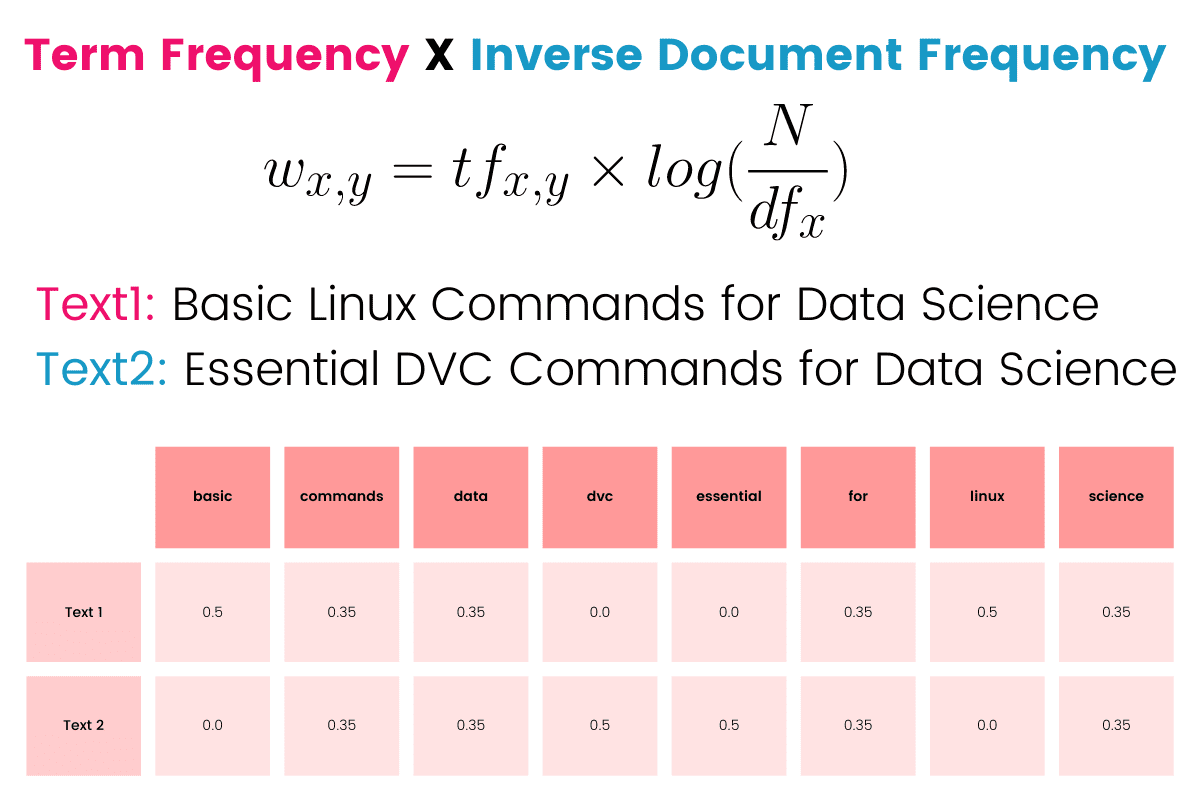

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModel

vectorizer_tfidf = TfidfVectorizer()

# Fit transform nie trenuje modelu a przygotowuje macierz - czyli tak naprawdę nie powinno mieć w nawie fit
# Tą macierz można potem użyć do modelu - bo model operuje na tensorach (tablicach tablic)
tfidf_matrix = vectorizer_tfidf.fit_transform(data)
tfidf_matrix.toarray()

array([[0.        , 0.46369322, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46369322, 0.37410477, 0.        ,
        0.        , 0.        , 0.46369322, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.46369322,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.33333333,
        0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
        0.33333333, 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.28609079, 0.        , 0.        ,
        0.        , 0.    

### Bag of Words Embeddings

In [8]:
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

def get_bag_of_words(text):
    """
    Create a bag of words representation manually.
    
    Args:
        documents: List of text documents
        
    Returns:
        vocabulary: Dictionary mapping words to indices
        bow_vectors: List of document vectors
    """
    # Preprocessing (lowercase and tokenize by splitting on spaces)
    tokenized_data = [text.lower().split() for text in text]
    
    # Create vocabulary (unique words across all documents)
    all_words = []
    for doc in tokenized_data:
        all_words.extend(doc)
    vocabulary = {word: idx for idx, word in enumerate(sorted(set(all_words)))}
    
    # Create BoW vectors
    bow_vectors = []
    for text in tokenized_data:
        # Count word occurrences in this document
        word_counts = Counter(text)
        
        # Create vector with counts for each word in vocabulary
        vector = [0] * len(vocabulary)
        for word, count in word_counts.items():
            if word in vocabulary:
                vector[vocabulary[word]] = count
        bow_vectors.append(vector)
    
    return vocabulary, bow_vectors


vocabulary, bow_vectors = get_bag_of_words(data)

print("Vocabulary:", vocabulary)
print("\nDocument Vectors:")
for i, vec in enumerate(bow_vectors):
    print(f"Document {i+1}: {vec}")
    
vectors_similarity = cosine_similarity(bow_vectors)
print("\n", vectors_similarity)

Vocabulary: {'ai': 0, 'amazing!': 1, 'are': 2, 'based': 3, 'content': 4, 'creates': 5, 'data.': 6, 'embeddings': 7, 'for': 8, 'generative': 9, 'input': 10, 'is': 11, 'language': 12, 'large': 13, 'mechanisms.': 14, 'models': 15, 'natural': 16, 'new': 17, 'nlp': 18, 'numerical': 19, 'of': 20, 'on': 21, 'powerful': 22, 'processing': 23, 'representations': 24, 'revolutionized': 25, 'self-attention': 26, 'tasks.': 27, 'text.': 28, 'tools': 29, 'transformers': 30, 'with': 31}

Document Vectors:
Document 1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Document 2: [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Document 3: [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
Document 4: [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
Document 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

### Sentence Transformers Embeddings

In [9]:
# Tutaj podobny przykład jak wyżej z Sentence Transformers ale pokazuje jak wyglądają wektory
# W tym przypadku te wektory są od -1 do 1
model_sentence_transformer = SentenceTransformer('paraphrase-MiniLM-L6-v2')
sentence_embeddings_st = model_sentence_transformer.encode(data)
print("\nSentence Transformers Embeddings:")
sentence_embeddings_st


Sentence Transformers Embeddings:


array([[-0.5704893 , -0.6188256 , -0.6521709 , ...,  0.35315868,
         0.11846467, -0.17394406],
       [-0.40289292, -0.5861289 , -0.16168348, ...,  0.50399005,
         0.14962226, -0.18223561],
       [-0.46156693, -0.3519274 , -0.14583594, ...,  0.28248042,
         0.34002215, -0.32039526],
       [-0.52639675,  0.14042683, -0.05704289, ...,  0.09484162,
         0.5598052 ,  0.11080857],
       [-0.47334665,  0.03769549, -0.15893365, ...,  0.47700903,
         0.13331635, -0.31712264]], dtype=float32)

### OpenAI-like Transformer Embeddings

In [10]:
tokenizer_openai = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model_openai = AutoModel.from_pretrained("distilbert-base-uncased")

def get_openai_embedding(text):
    tokens = tokenizer_openai(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model_openai(**tokens)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

openai_embeddings = [get_openai_embedding(sentence) for sentence in data]
print("\nOpenAI-like Transformer Embeddings:")
for i, embedding in enumerate(openai_embeddings):
    print(f"Sentence {i+1}: {embedding}")


OpenAI-like Transformer Embeddings:
Sentence 1: [[-4.82468084e-02  9.54295248e-02 -8.69555101e-02 -7.10221231e-02
   3.12841684e-01 -2.05211043e-01  1.99953616e-01  6.25039339e-01
  -3.32058728e-01 -1.92167833e-01  5.53938523e-02 -1.83592677e-01
  -3.11199397e-01  1.71012133e-01 -2.10661441e-01  1.22362748e-01
  -4.87075076e-02  1.12712473e-01 -7.73214921e-02  1.25385642e-01
  -6.34482130e-02 -1.34184346e-01 -1.29309535e-01  2.08260298e-01
   3.10339332e-01 -3.18081498e-01 -1.94109827e-01  1.03337988e-02
  -1.71385765e-01 -1.98119462e-01  1.15274616e-01  1.99875712e-01
  -4.44333255e-02 -1.72323883e-01 -3.52420479e-01 -2.40876898e-02
  -2.43292689e-01 -1.98845081e-02 -3.11597914e-01  1.37647673e-01
  -3.65004599e-01 -9.05991644e-02 -2.05745809e-02  9.22486186e-02
  -2.70932078e-01 -2.62592107e-01 -5.92689931e-01  4.38994505e-02
   3.35771978e-01  5.38698137e-02 -4.69823748e-01  1.07672513e-01
  -1.95525646e-01  3.39732729e-02 -2.72193328e-02  3.45743418e-01
  -1.85235769e-01 -3.346237

# 4. Similarity Measures

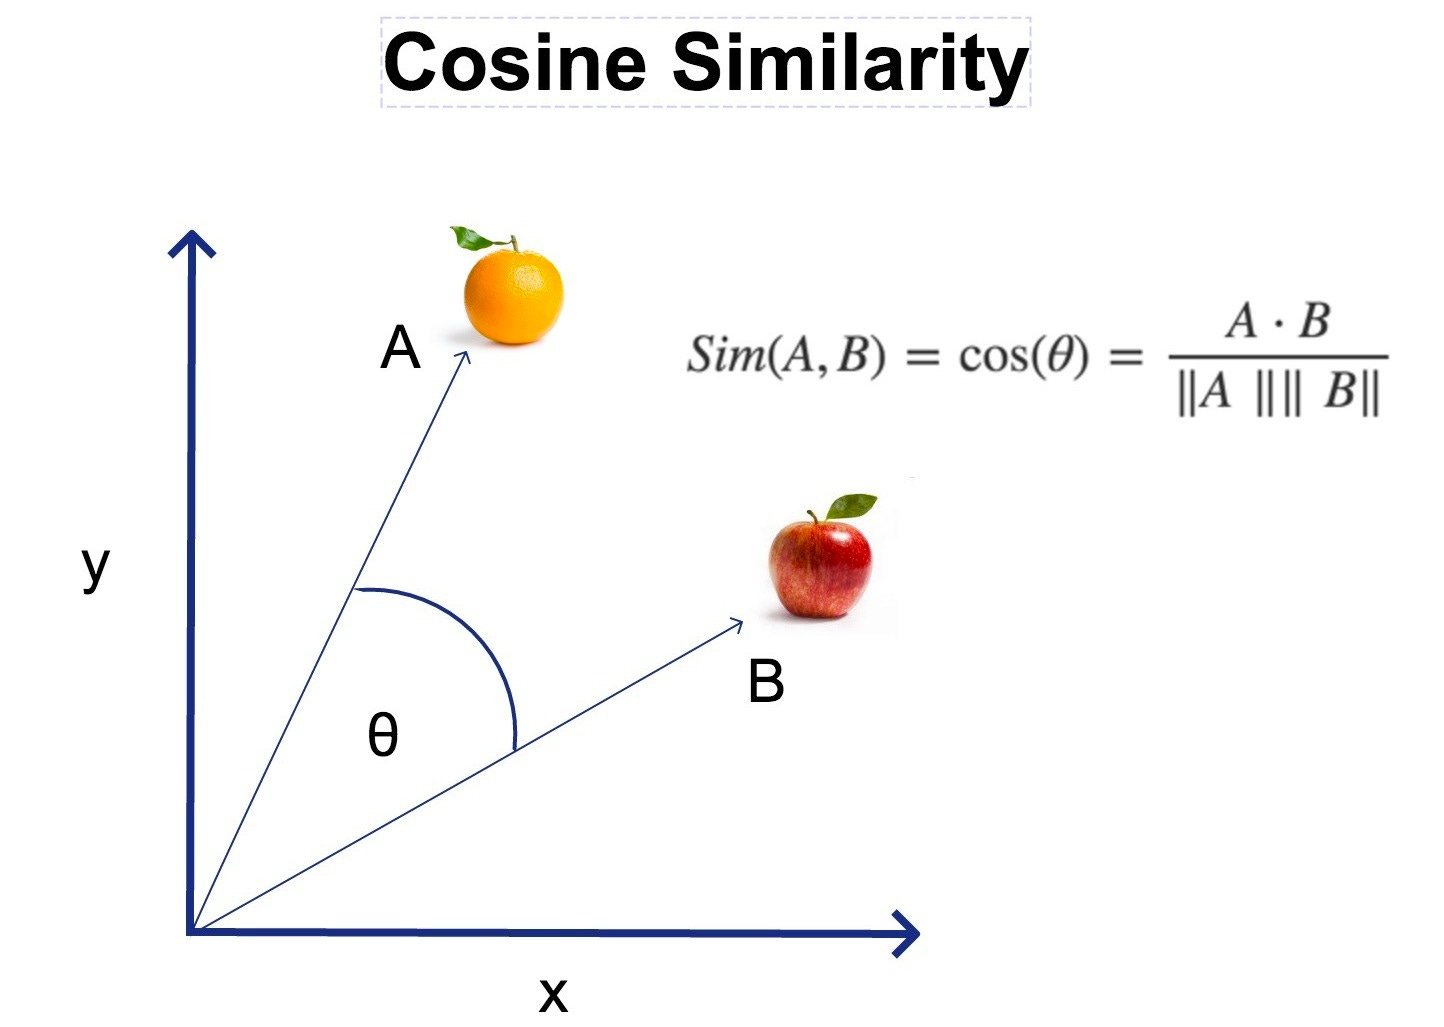
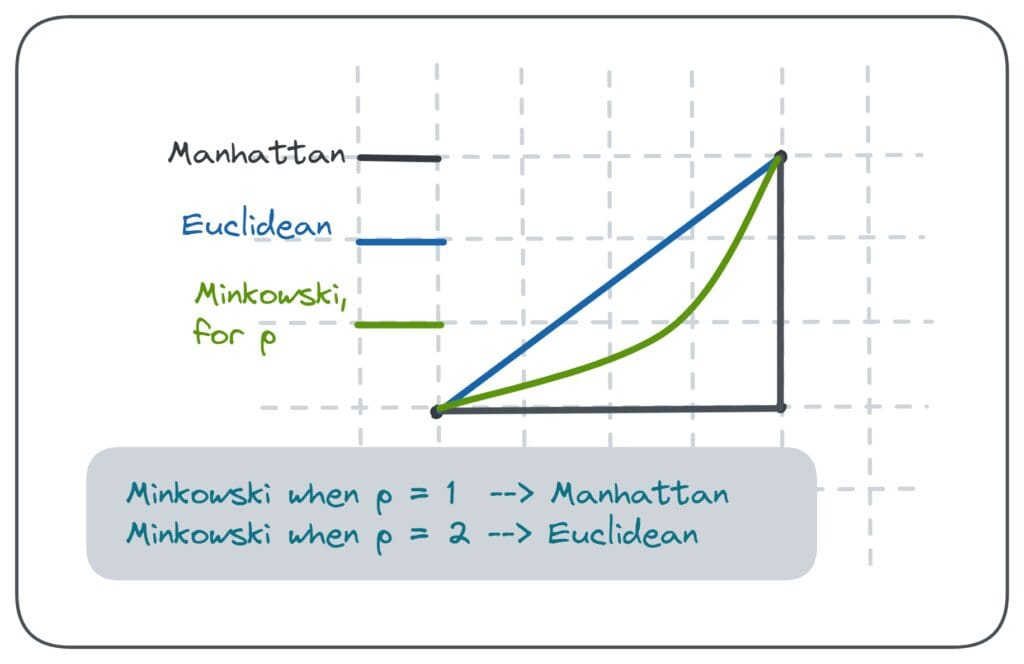

In [11]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Cosine Similarity between first two sentences (TF-IDF)
cos_sim_tfidf = cosine_similarity(tfidf_matrix[2], tfidf_matrix[4])
print("\nCosine Similarity (TF-IDF):", cos_sim_tfidf[0][0])

# Euclidean Distance (Sentence Transformers)
euc_dist_st = euclidean_distances([sentence_embeddings_st[2]], [sentence_embeddings_st[4]])[0][0]
print("\nEuclidean Distance (Sentence Transformers):", euc_dist_st)

# Jaccard Similarity (Token Sets)
tokens_s1 = set(data[2].lower().split())
tokens_s2 = set(data[4].lower().split())
jaccard_sim = len(tokens_s1.intersection(tokens_s2)) / len(tokens_s1.union(tokens_s2))
print("\nJaccard Similarity:", jaccard_sim)


Cosine Similarity (TF-IDF): 0.0895005386752225

Euclidean Distance (Sentence Transformers): 6.7337127

Jaccard Similarity: 0.07142857142857142


# 5. Introduction to RAG: Reading and Splitting PDF Data

In [12]:
import fitz  # PyMuPDF
import re

# Function to read PDF and extract text
def read_pdf(file_path):
    pdf_document = fitz.open(file_path)
    text = ""
    for page in pdf_document:
        text += page.get_text() + '\n'
    pdf_document.close()
    return text

# Function to count characters
def count_characters(text):
    return len(text)

# Function to count tokens (words and punctuation)
def count_tokens(text):
    # Simple tokenization by splitting on whitespace and keeping punctuation
    tokens = re.findall(r'\b\w+\b|[^\w\s]', text)
    return len(tokens)

# Function to count words only
def count_words(text):
    # Count only word tokens, not punctuation
    words = re.findall(r'\b\w+\b', text)
    return len(words)

# Function to count sentences
def count_sentences(text):
    # Split on sentence-ending punctuation followed by space or newline
    sentences = re.split(r'[.!?]+[\s\n]+', text)
    # Remove empty strings that might result from the split
    sentences = [s for s in sentences if s.strip()]
    return len(sentences)

# Example usage
pdf_text = read_pdf('data/RAG for LLM - Survey.pdf')
print("Extracted PDF Text (first 500 characters):")
print(pdf_text[:500] + "...")  # Print just the first 500 characters for preview

# Calculate and print statistics
char_count = count_characters(pdf_text)
token_count = count_tokens(pdf_text)
word_count = count_words(pdf_text)
sentence_count = count_sentences(pdf_text)

print(f"Number of characters: {char_count}")
print(f"Number of tokens: {token_count}")
print(f"Number of words: {word_count}")
print(f"Number of sentences: {sentence_count}")

Extracted PDF Text (first 500 characters):
1
Retrieval-Augmented Generation for Large
Language Models: A Survey
Yunfan Gaoa, Yun Xiongb, Xinyu Gaob, Kangxiang Jiab, Jinliu Panb, Yuxi Bic, Yi Daia, Jiawei Suna, Meng
Wangc, and Haofen Wang a,c
aShanghai Research Institute for Intelligent Autonomous Systems, Tongji University
bShanghai Key Laboratory of Data Science, School of Computer Science, Fudan University
cCollege of Design and Innovation, Tongji University
Abstract—Large Language Models (LLMs) showcase impres-
sive capabilities but e...
Number of characters: 109739
Number of tokens: 24170
Number of words: 16713
Number of sentences: 1849


In [13]:
import pandas as pd

def create_comparison_dataframe(sentences, chunks, max_rows=5):

    sentence_list = sentences[:max_rows]
    chunk_list = chunks[:max_rows]
    
    id_list = list(range(1, max_rows + 1))
    
    df = pd.DataFrame({
        'ID': id_list,
        'pdf_sentence': sentence_list,
        'pdf_chunk': chunk_list
    })
    
    return df

# Split PDF Text into Sentences
pdf_sentences = pdf_text.split('. ')
print("\nPDF Sentences:")
for sentence in pdf_sentences[:2]:
    print(sentence)
    
# Fixed-Size Chunking on PDF Text
# Function is defined at the beginning of the notebook
pdf_chunks = fixed_size_chunking(pdf_text, chunk_size=50)
print("\nPDF Fixed-Size Chunks:")
for chunk in pdf_chunks[:2]:
    print(chunk)
    
# Create and display the comparison DataFrame
comparison_df = create_comparison_dataframe(pdf_sentences, pdf_chunks, max_rows=5)
print("\nComparison DataFrame:")
comparison_df


PDF Sentences:
1
Retrieval-Augmented Generation for Large
Language Models: A Survey
Yunfan Gaoa, Yun Xiongb, Xinyu Gaob, Kangxiang Jiab, Jinliu Panb, Yuxi Bic, Yi Daia, Jiawei Suna, Meng
Wangc, and Haofen Wang a,c
aShanghai Research Institute for Intelligent Autonomous Systems, Tongji University
bShanghai Key Laboratory of Data Science, School of Computer Science, Fudan University
cCollege of Design and Innovation, Tongji University
Abstract—Large Language Models (LLMs) showcase impres-
sive capabilities but encounter challenges like hallucination,
outdated knowledge, and non-transparent, untraceable reasoning
processes
Retrieval-Augmented Generation (RAG) has emerged
as a promising solution by incorporating knowledge from external
databases

PDF Fixed-Size Chunks:
1 Retrieval-Augmented Generation for Large Language Models: A Survey Yunfan Gaoa, Yun Xiongb, Xinyu Gaob, Kangxiang Jiab, Jinliu Panb, Yuxi Bic, Yi Daia, Jiawei Suna, Meng Wangc, and Haofen Wang a,c aShanghai Research Insti

,ID,pdf_sentence,pdf_chunk
0,1,1\nRetrieval-Augmented Generation for Large\nL...,1 Retrieval-Augmented Generation for Large Lan...
1,2,Retrieval-Augmented Generation (RAG) has emerg...,Fudan University cCollege of Design and Innova...
2,3,This enhances the accuracy and credibility of ...,"of the generation, particularly for knowledge-..."
3,4,RAG synergistically merges LLMs’ intrin-\nsic ...,"Naive RAG, the Advanced RAG, and the Modular R..."
4,5,This comprehensive review paper offers a detai...,"RAG systems. Furthermore, this paper introduce..."


### nltk to enchance and process language

In [14]:
# NLTK - Natural Language Toolkit
# Przydate w analizie sentymentu
import nltk
from nltk.corpus import stopwords
# Stopwords - słowa które nie mają znaczenia w kontekście analizy tekstu
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
print(stop_words)

{'who', "she'll", 'his', 'when', "shouldn't", "they'll", 'through', 'been', "needn't", 'while', 'you', 'that', 'will', 'by', 'have', 'same', 'hadn', 'aren', 'wouldn', 'mustn', 'so', 'were', 'which', "you'd", 'no', 'an', 'can', 'am', 'yourselves', 'few', 'themselves', 'o', 'don', 'our', "wasn't", "aren't", 'in', 'hers', 'against', 'this', 'those', 'i', 'most', 'and', 'own', "we'd", 'not', 'himself', 'weren', 'myself', "you're", "didn't", 'other', "won't", "weren't", 'll', 'during', "we're", 'each', 'she', 'under', 'won', 'yours', "couldn't", 'didn', 'down', 'very', "it'd", 'if', "we've", "i'm", 'we', "wouldn't", 'be', 'doing', 'off', 'has', "should've", 'all', 'once', "hasn't", 'below', "we'll", 'me', 'between', "doesn't", 'd', 'theirs', 'y', "i'd", 'whom', 'too', 'it', 'its', 'm', 'more', 'my', 'on', "hadn't", "mustn't", 'these', "that'll", 'are', 'only', 'him', 'or', 'should', "they'd", 'ours', "i've", 'being', 'further', 'do', "don't", 'at', 'how', 'with', 'any', "shan't", 'wasn', 'h

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomasz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Semantic Splitting on PDF Text Using Sentence Transformers


In [15]:
pdf_embeddings = model_semantic_split.encode(pdf_sentences[:100]) 
semantic_pdf_groups = []
for i, embedding in enumerate(pdf_embeddings):
    group = [pdf_sentences[i]]
    for j in range(len(pdf_embeddings)):
        if i != j and cosine_similarity([embedding], [pdf_embeddings[j]])[0][0] > 0.8:
            group.append(pdf_sentences[j])
    semantic_pdf_groups.append(group)

print("\nSemantic Groups from PDF:")
for group in semantic_pdf_groups:
    print(group)


Semantic Groups from PDF:
['1\nRetrieval-Augmented Generation for Large\nLanguage Models: A Survey\nYunfan Gaoa, Yun Xiongb, Xinyu Gaob, Kangxiang Jiab, Jinliu Panb, Yuxi Bic, Yi Daia, Jiawei Suna, Meng\nWangc, and Haofen Wang a,c\naShanghai Research Institute for Intelligent Autonomous Systems, Tongji University\nbShanghai Key Laboratory of Data Science, School of Computer Science, Fudan University\ncCollege of Design and Innovation, Tongji University\nAbstract—Large Language Models (LLMs) showcase impres-\nsive capabilities but encounter challenges like hallucination,\noutdated knowledge, and non-transparent, untraceable reasoning\nprocesses']
['Retrieval-Augmented Generation (RAG) has emerged\nas a promising solution by incorporating knowledge from external\ndatabases']
['This enhances the accuracy and credibility of the\ngeneration, particularly for knowledge-intensive tasks, and allows\nfor continuous knowledge updates and integration of domain-\nspecific information']
['RAG syne

# Langchain splitters

https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/

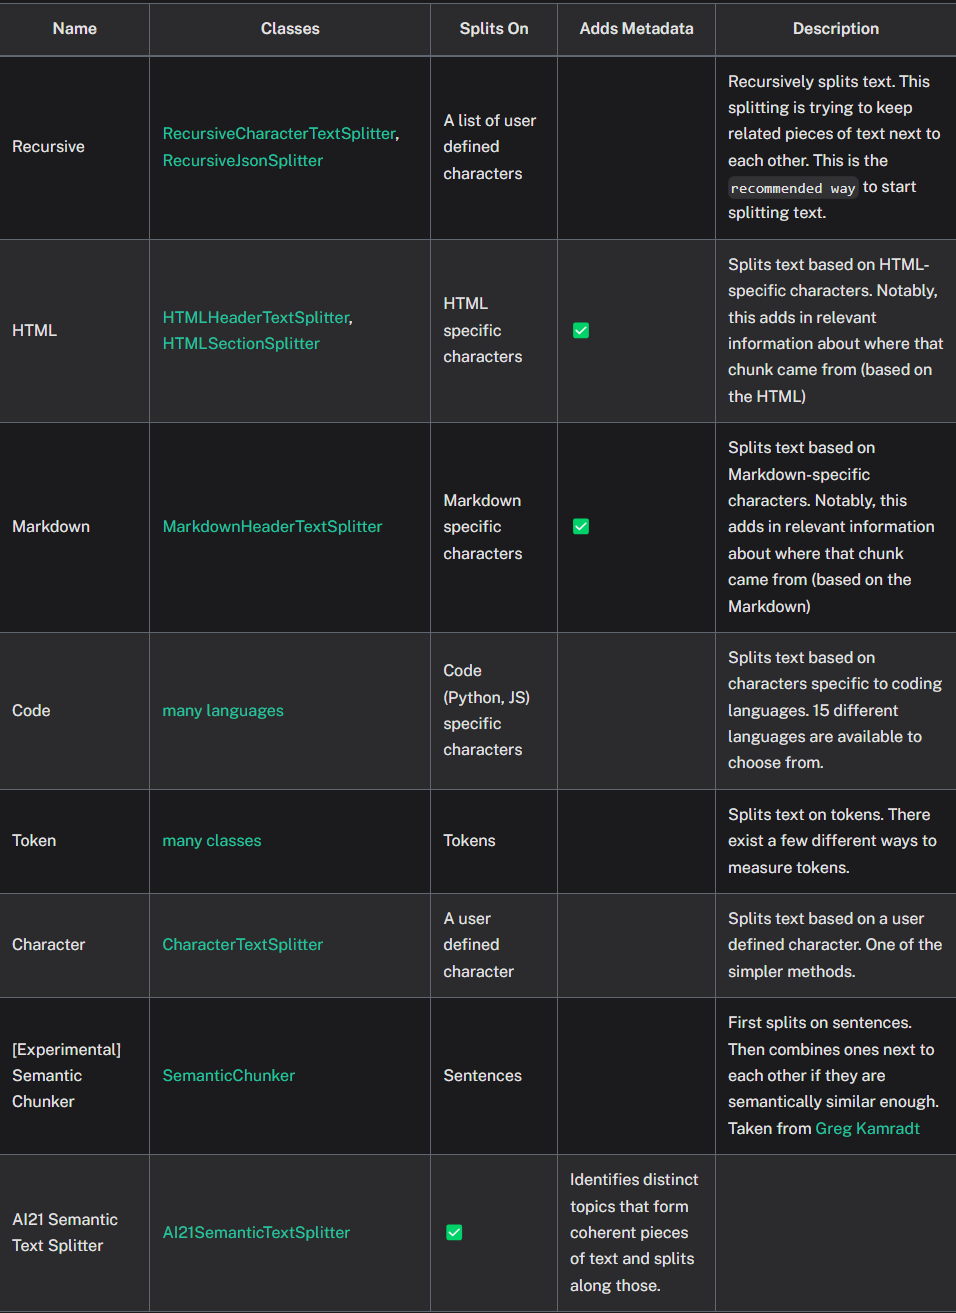

# Langchain Simple RAG

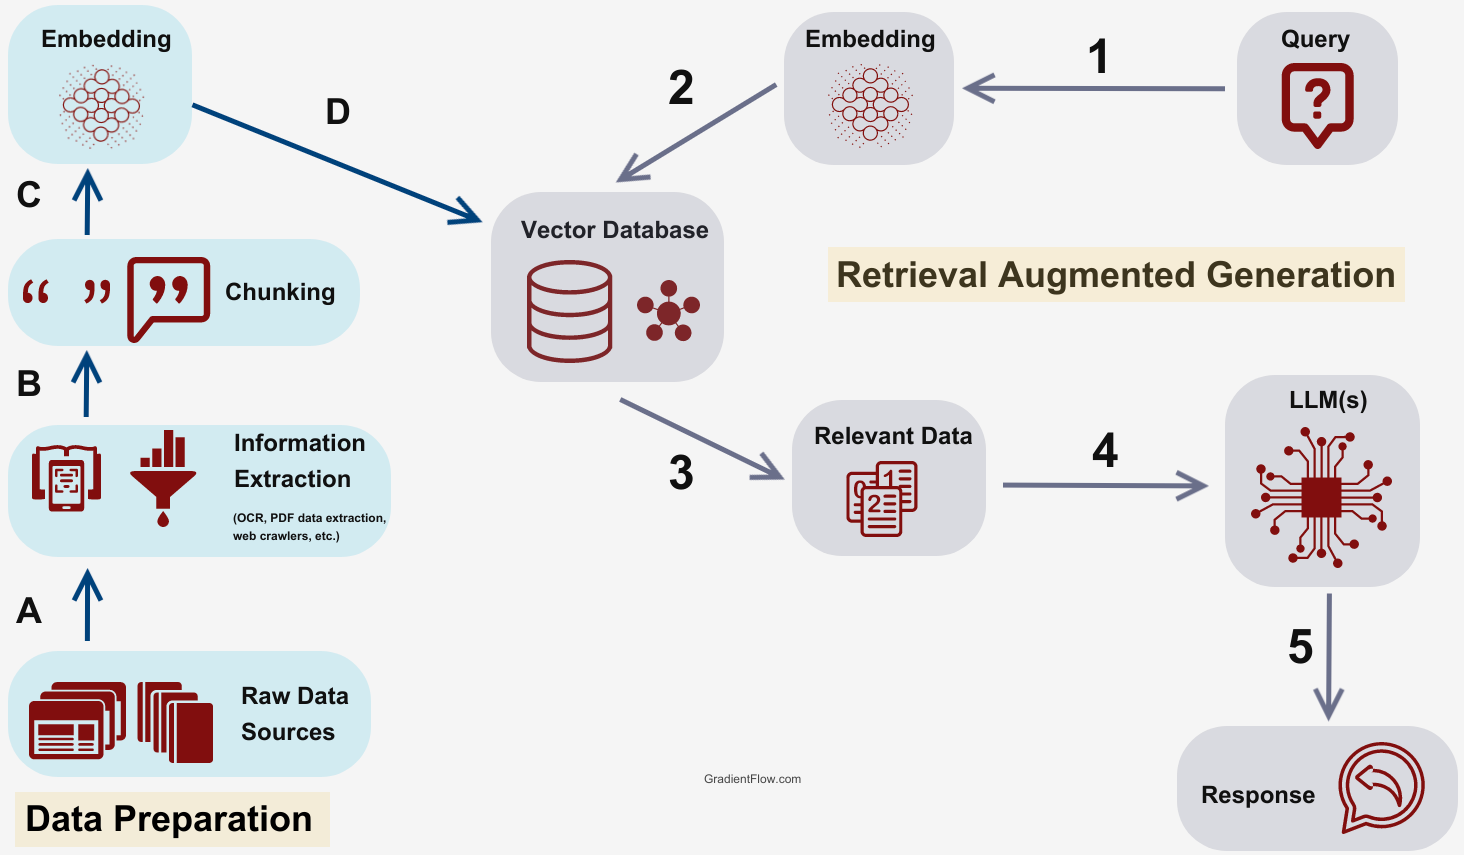

In [16]:
import fitz  # PyMuPDF
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

### Step 1: Load the PDF

In [17]:
pdf_path = 'data/RAG for LLM - Survey.pdf'
loader = PyMuPDFLoader(pdf_path)
documents = loader.load()

print(f"Loaded {len(documents)} pages from the PDF")
print(f"Sample text from first page: {documents[0].page_content[:200]}...")

Loaded 21 pages from the PDF
Sample text from first page: 1
Retrieval-Augmented Generation for Large
Language Models: A Survey
Yunfan Gaoa, Yun Xiongb, Xinyu Gaob, Kangxiang Jiab, Jinliu Panb, Yuxi Bic, Yi Daia, Jiawei Suna, Meng
Wangc, and Haofen Wang a,c
a...


### Step 2: Split the document into chunks using RecursiveCharacterTextSplitter

In [18]:
# Tutaj idzie troche randomowy split - bardzo wazne jest by zrobic to dobrze w realnym przypadku
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=50,
    # Length function - jak kalkulowana jest długość chunka
    length_function=len,
    # Separatory chunków
    separators=["\n\n", "\n", " ", ""]
)

chunks = text_splitter.split_documents(documents)
print(f"Split document into {len(chunks)} chunks")
print(f"Sample chunk: {chunks[49].page_content}...")

Split document into 125 chunks
Sample chunk: (Augmentation-Adapted Retriver) [47] introduces a universal
adapter designed to accommodate multiple downstream tasks.
While PRCA [69] add a pluggable reward-driven contextual
adapter to enhance performance on specific tasks. BGM [26]
keeps the retriever and LLM fixed,and trains a bridge Seq2Seq
model in between. The bridge model aims to transform the
retrieved information into a format that LLMs can work with
effectively, allowing it to not only rerank but also dynami-
cally select passages for each query, and potentially employ
more advanced strategies like repetition. Furthermore, PKG...


### Step 3: Download and load embedding model

In [19]:
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
print("Using local HuggingFace embedding model: sentence-transformers/all-MiniLM-L6-v2")

Using local HuggingFace embedding model: sentence-transformers/all-MiniLM-L6-v2


### Step 4: Create vector database

In [20]:
# Ten krok może zająć sporo czasu jak mamy dużo danych
vectorstore = FAISS.from_documents(chunks, embedding_model)
print("Vector database created successfully")

Vector database created successfully


### Step 5: Define a query and encode it to vector

In [21]:
query = "What are the main challenges of RAG systems?"
print(f"Query: {query}")

# Get the query embedding
query_embedding = embedding_model.embed_query(query)
print(f"Query embedding shape: {len(query_embedding)}")
print(f"Sample of query embedding vector: {query_embedding}...")

Query: What are the main challenges of RAG systems?
Query embedding shape: 384
Sample of query embedding vector: [-0.07626841962337494, 0.06949081271886826, 0.05083799734711647, -0.013411503285169601, -0.07748909294605255, 0.030545655637979507, -0.05161803588271141, 0.07209411263465881, -0.08722265809774399, 0.037841957062482834, -0.0010277561377733946, -0.0006496922578662634, 0.010737613774836063, 0.013629232533276081, -0.03209526091814041, -0.007027346640825272, 0.051797859370708466, 0.09723976254463196, -0.013034790754318237, 0.00621397327631712, -0.01629570685327053, 0.012595764361321926, -0.009082537144422531, 0.02775982953608036, -0.08827794343233109, 0.007933738641440868, -0.04761910438537598, -0.028902888298034668, 0.05215105041861534, -0.07867919653654099, -0.0525665320456028, 0.03587212413549423, -0.022455187514424324, -0.06951404362916946, -0.01605071872472763, 0.018692513927817345, 0.04507090523838997, 0.03211740031838417, -0.021205412223935127, 0.02340676449239254, 0.00815

### Step 6: Perform similarity search

In [22]:
def calculate_cosine_similarity(query_vector, document_vector):
    query_vector = np.array(query_vector).reshape(1, -1)
    document_vector = np.array(document_vector).reshape(1, -1)
    return cosine_similarity(query_vector, document_vector)[0][0]

# Tutaj jest to wzięte statycznie - po prostu 1 chunk
first_chunk_embedding = embedding_model.embed_documents([chunks[1].page_content])[0]

print(f"Comparing 2 vectors with lengths: {len(query_embedding)} vs {len(first_chunk_embedding)}")
similarity = calculate_cosine_similarity(query_embedding, first_chunk_embedding)
print(f"Manual cosine similarity with first chunk: {similarity:.4f}")

Comparing 2 vectors with lengths: 384 vs 384
Manual cosine similarity with first chunk: 0.3524


### Search embedded query in vector store

In [23]:
search_results = vectorstore.similarity_search_with_score(query, k=5)

context = ""
# Print the results
print("\nSearch Results:")
for i, (doc, score) in enumerate(search_results):
    print(f"Result {i+1} (Score: {score:.4f}):")
    print(f"Source: Page {doc.metadata.get('page', 'Unknown')}")
    print(f"Content: {doc.page_content}...\n")
    context += doc.page_content + ". "


Search Results:
Result 1 (Score: 0.7850):
Source: Page 0
Content: fine-tuning techniques.
The burgeoning field of RAG has experienced swift growth,
yet it has not been accompanied by a systematic synthesis that
could clarify its broader trajectory. This survey endeavors to
fill this gap by mapping out the RAG process and charting
its evolution and anticipated future paths, with a focus on the
integration of RAG within LLMs. This paper considers both
technical paradigms and research methods, summarizing three
main research paradigms from over 100 RAG studies, and
analyzing key technologies in the core stages of “Retrieval,”
“Generation,” and “Augmentation.” On the other hand, current
research tends to focus more on methods, lacking analysis and
summarization of how to evaluate RAG. This paper compre-
hensively reviews the downstream tasks, datasets, benchmarks,
and evaluation methods applicable to RAG. Overall, this
paper sets out to meticulously compile and categorize the
foundational

### Save Vector Data to local file

In [24]:
vectorstore.save_local("rag_survey_faiss_index")
print("Vector database saved locally for future use")

Vector database saved locally for future use


Next steps will be to connect to LLM model with:
- system message
- enriched prompt: context from database + user query 

In [25]:
search_results
# Metadata się przydaje do filtrowania (po jakiej stronie, keywordach itd)

[(Document(id='9a69a37e-efea-4cf5-93a4-c8c3a583a3f4', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-03-28T00:54:45+00:00', 'source': 'data/RAG for LLM - Survey.pdf', 'file_path': 'data/RAG for LLM - Survey.pdf', 'total_pages': 21, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-03-28T00:54:45+00:00', 'trapped': '', 'modDate': 'D:20240328005445Z', 'creationDate': 'D:20240328005445Z', 'page': 0}, page_content='fine-tuning techniques.\nThe burgeoning field of RAG has experienced swift growth,\nyet it has not been accompanied by a systematic synthesis that\ncould clarify its broader trajectory. This survey endeavors to\nfill this gap by mapping out the RAG process and charting\nits evolution and anticipated future paths, with a focus on the\nintegration of RAG within LLMs. This paper considers both\ntechnical paradigms and research methods, summarizing three\nmain research paradigms from over 

In [ ]:
context.split("\n")

# Ile znakow
print(len(context))

4103


In [ ]:
import os
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage
from dotenv import load_dotenv

load_dotenv()

# Ciekawa uwaga - dodanie znaczników <context> i </context> w system_message sprawia, że model nie będzie chciał odpowiadać na pytania które nie są w kontekście (nawet jeśli nie damy mu contextu jako zmiennej)
# Co za tym idzie - kontektst jest kluczowy!
system_message = f"You are helpful personal assistant. While responding use only information from received context: <context>{context}</context>. If there is no clear answer from the context give user information about Failure"

human_message = "What are types of RAGs?"

chat = ChatOpenAI(
    model_name="gpt-4o-mini",
    openai_api_key=os.environ['OPENAI_API_KEY'],
)

response = chat.invoke([
    SystemMessage(content=system_message),
    HumanMessage(content=human_message)
])

print(response.content)


The types of RAGs are categorized into three stages: Naive RAG, Advanced RAG, and Modular RAG.
